<a href="https://colab.research.google.com/github/hamidsadeghi68/face-clustering/blob/main/clustering_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generate 2d dataset**

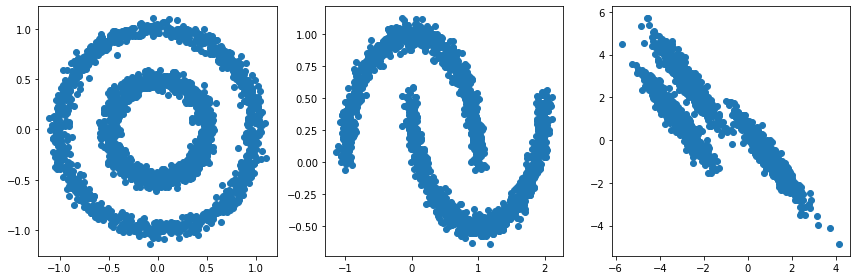

In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
import numpy as np

n_samples = 2000
np.random.seed(0)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

sample_datasets = [noisy_circles, noisy_moons, aniso]

figsize = 4
plt.figure(figsize=(figsize*len(sample_datasets),figsize))
for i, dataset in enumerate(sample_datasets):
  plt.subplot(1, len(sample_datasets), i+1)
  plt.scatter(dataset[0][:, 0], dataset[0][:, 1])
  plt.tight_layout()

plt.show()

**Clustering**

[-1 -1 -1 ... -1 -1 -1]
[0 0 1 ... 1 1 0]
[0 1 2 ... 2 2 0]


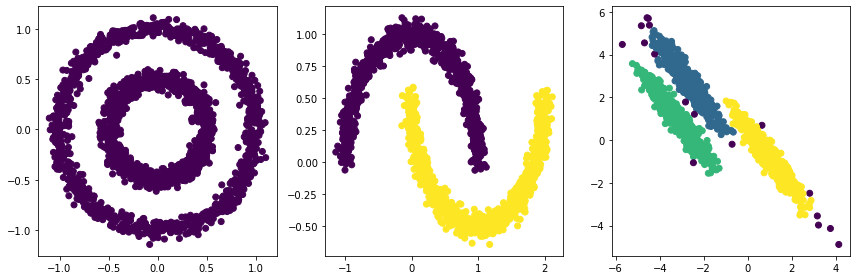

In [ ]:
figsize = 4
plt.figure(figsize=(figsize*len(sample_datasets),figsize))
eps_values = [0.2, 0.25, 0.25]
min_samples = [3, 3, 3]

for i, dataset in enumerate(sample_datasets):
  X = dataset[0]
  y_pred = cluster.DBSCAN(eps=eps_values[i], min_samples=min_samples[i]).fit_predict(X)
  plt.subplot(1, len(sample_datasets), i+1)
  plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred)
  plt.tight_layout()

plt.show()

**Evaluation**

In [ ]:
# download evaluation.py from my github page to use in colab machine
!wget https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/evaluation.py

--2021-12-06 10:54:31--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/evaluation.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674 [text/plain]
Saving to: ‘evaluation.py’

evaluation.py       100%[===================>]     674  --.-KB/s    in 0s      

2021-12-06 10:54:31 (27.0 MB/s) - ‘evaluation.py’ saved [674/674]



In [ ]:
from evaluation import evaluate_clustering
evaluate_clustering(y, y_pred)

Rand Index: 0.994349, NMI: 0.975012, F-measure: 0.991444


**reference**

scikit-learn:

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

